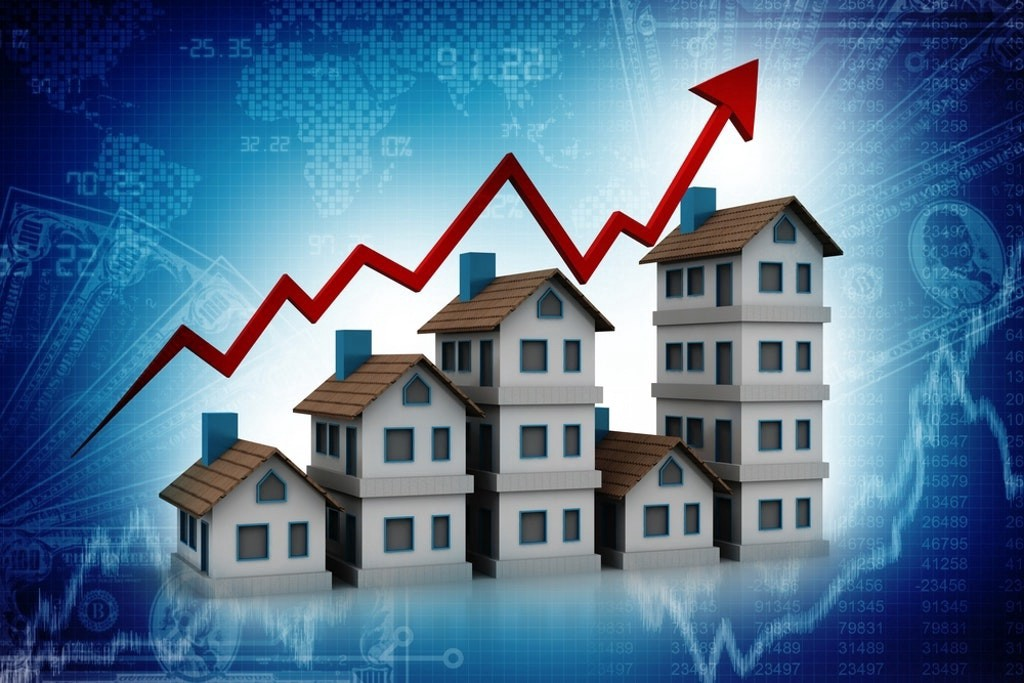

In [1]:
from IPython.display import Image
Image("../input/image-house-prices-advanced-regression/image.jpeg")


#  Predict sales prices and practice feature engineering, RFs, and gradient boosting

## 1. Problem defition


> Predict the value of the SalePrice variable. 

## 2. Data


https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data



    **Data Details:**
    
* Here's a brief version of what you'll find in the data description file.
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale





##  Evaluation

 The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices
 
 https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation



# 1. Data

## 1.1 Import Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import xgboost

In [3]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.shape

(1460, 81)

In [5]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
df_train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [9]:
# Skewness
df_train.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [10]:
class_counts = df_train['SalePrice'].value_counts()
class_counts

140000    20
135000    17
145000    14
155000    14
190000    13
          ..
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64

## 1.2 Data Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd500edbc50>,
      dtype=object)

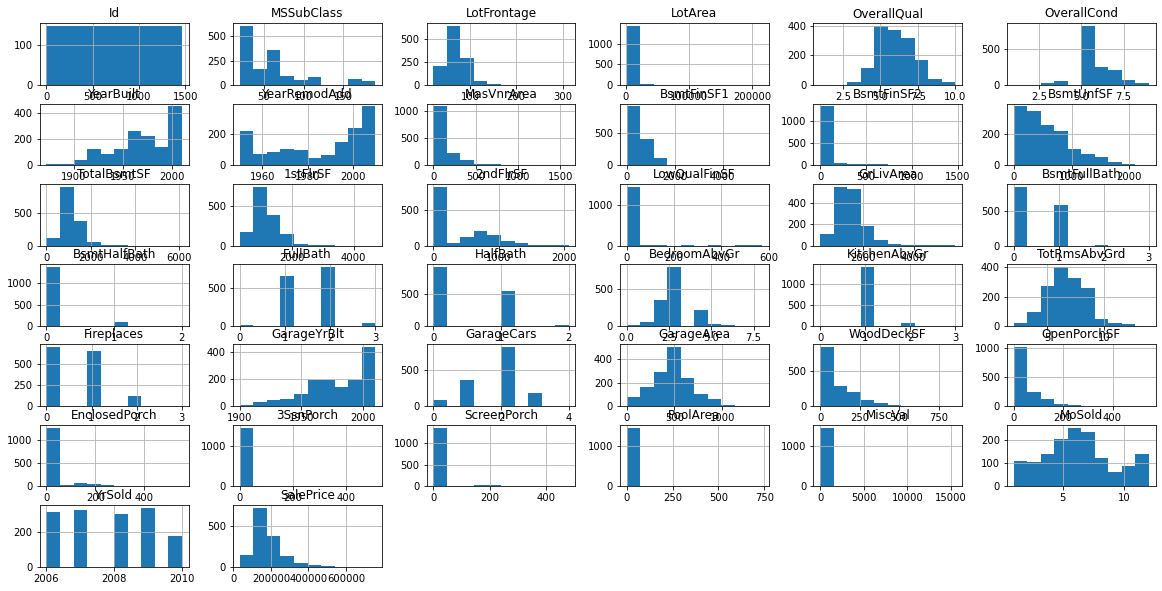

In [11]:
# Histogram
df_train.hist(figsize=(20, 10))

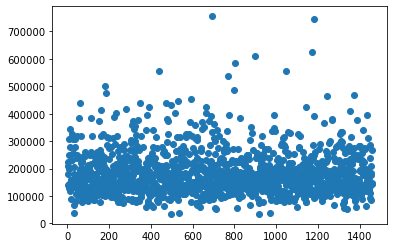

In [12]:
# Scatter plot
fig, ax = plt.subplots()
ax.scatter(df_train['Id'], df_train['SalePrice'])

## 1.3 Data preparation

In [13]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [14]:
# Process the test data 
df_train = preprocess_data(df_train)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageYrBlt_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1,60,4,65.0,8450,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False


In [15]:
# Process the test data 
df_train = preprocess_data(df_train)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageYrBlt_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1,60,4,65.0,8450,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 127 entries, Id to SaleCondition_is_missing
dtypes: bool(46), float64(3), int64(35), int8(43)
memory usage: 560.5 KB


### Modelling

 ## 2.1 Building an evaluation function

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
          'linear_regression' : LinearRegression(),
          'Random Forest': RandomForestRegressor(),
          'linear_model' : linear_model.Lasso(alpha=0.1),
          'XGBoost' : XGBRegressor()
           
          }

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : validation data (no labels)
    y_train : training labels
    y_test : validation labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
    

In [18]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test= X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 406574155520.52026, tolerance: 741795749.9355
  positive)


{'Logistic Regression': 0.003424657534246575,
 'linear_regression': 0.7899072682860908,
 'Random Forest': 0.8509814074164975,
 'linear_model': 0.789939248325461,
 'XGBoost': 0.8010588920818033}

## 2.2 Evaluate Models

In [19]:
models = {'Logistic Regression': LogisticRegression(),
          'linear_regression' : LinearRegression(),
          'Random Forest': RandomForestRegressor(),
          'linear_model' : linear_model.Lasso(alpha=0.1),
          'XGBoost' : XGBRegressor()
           
          }

# Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_preds = model1.predict(X_test)
print('Logistic Regression')
print('MAE', mean_absolute_error(y_test, y_preds))
print('RMSLE', mean_squared_log_error(y_test, y_preds))
print('r-squared', r2_score (y_test, y_preds))

# linear_regression
model2 = LinearRegression()
model2 = LogisticRegression()
model2.fit(X_train, y_train)
y_preds = model2.predict(X_test)
print('linear_regression')
print('MAE', mean_absolute_error(y_test, y_preds))
print('RMSLE', mean_squared_log_error(y_test, y_preds))
print('r-squared', r2_score (y_test, y_preds))

# Random Forest
model3 = RandomForestRegressor()
model3.fit(X_train, y_train)
y_preds = model3.predict(X_test)
print('Random Forest')
print('MAE', mean_absolute_error(y_test, y_preds))
print('RMSLE', mean_squared_log_error(y_test, y_preds))
print('r-squared', r2_score (y_test, y_preds))

# linear_model
model4 = linear_model.Lasso(alpha=0.1)
model4.fit(X_train, y_train)
y_preds = model4.predict(X_test)
print('linear_model')
print('MAE', mean_absolute_error(y_test, y_preds))
print('RMSLE', mean_squared_log_error(y_test, y_preds))
print('r-squared', r2_score (y_test, y_preds))

# XGBoost
model5 = XGBRegressor()
model5.fit(X_train, y_train)
y_preds = model5.predict(X_test)
print('XGBoost')
print('MAE', mean_absolute_error(y_test, y_preds))
print('RMSLE', mean_squared_log_error(y_test, y_preds))
print('r-squared', r2_score (y_test, y_preds))






/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression
MAE 44445.88698630137
RMSLE 0.10291400931835999
r-squared 0.20420017046768912


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


linear_regression
MAE 44445.88698630137
RMSLE 0.10291400931835999
r-squared 0.20420017046768912
Random Forest
MAE 17015.84044520548
RMSLE 0.019240470337034455
r-squared 0.8539932871522561
linear_model
MAE 19072.43496347831
RMSLE 0.024497038659534263
r-squared 0.789939248325461


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 406574155520.52026, tolerance: 741795749.9355
  positive)


XGBoost
MAE 17907.969525898974
RMSLE 0.02262604394901786
r-squared 0.8010588920818033


## Testing our model on a subset (to tune the hyperparameters)

In [20]:
%%time

# Instantiate model
model = XGBRegressor()

# Fit the model
model.fit(X_train, y_train)
y_preds = model.predict(X_test)



CPU times: user 1.45 s, sys: 9.94 ms, total: 1.46 s
Wall time: 377 ms


### Hyerparameter tuning with GridSearchCV


In [21]:
from sklearn.model_selection import GridSearchCV
grid = {'n_estimators' : [10, 1000],
        'learning_rate': [0.01, 0.1],
        'gamma' : [0.1, 5],
        'max_depth' : [3, 5, 8], 
        'subsample' : [0.8 ,0.9, 1],
        'colsample_bytree' : [0.3, 0,8],
        'gamma' : [0.1, 5]
        
    
}


xgb_model = GridSearchCV(XGBRegressor(),

                              param_grid=grid,
                              
                              cv=5,
                              verbose=20)

xgb_model.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.8 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.8, score=-3.939, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.8 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.8, score=-4.579, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.8 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.8, score=-5.481, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.8 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.8, score=-4.603, total=   0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.8, score=-3.012, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.9 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.9, score=-3.938, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.9 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.9, score=-4.572, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.9 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.9, score=-5.478, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.9 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, m

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s remaining:    0.0s


[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.9, score=-3.009, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1, score=-3.949, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1, score=-4.587, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1, score=-5.486, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.6s remaining:    0.0s


[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1, score=-3.011, total=   0.0s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.8 


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.6s remaining:    0.0s


[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.8, score=0.928, total=   0.9s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.8 


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    1.5s remaining:    0.0s


[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.8, score=0.915, total=   0.9s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.8 


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    2.4s remaining:    0.0s


[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.8, score=0.880, total=   0.9s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.8 


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    3.3s remaining:    0.0s


[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.8, score=0.913, total=   0.9s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.8 


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    4.1s remaining:    0.0s


[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.8, score=0.818, total=   0.9s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.9 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.9, score=0.928, total=   0.9s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.9 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.9, score=0.920, total=   1.0s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.9 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.9, score=0.879, total=   0.8s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.9 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py", line 548, in fit
    callbacks=callbacks)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/training.py", line 212, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/training.py", line 75, in _train_internal
    bst.update(dtrain, i, obj)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/core.py", line 1161, in update
    dtrain.handle))
  File "/opt/conda/lib/python3.7/site-packages/xgboost/core.py", line 188, in _check_call
    raise XGBoostE

[CV]  colsample_bytree=8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=0.9, score=nan, total=   0.0s
[CV] colsample_bytree=8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1 
[CV]  colsample_bytree=8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1, score=nan, total=   0.0s
[CV] colsample_bytree=8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1 
[CV]  colsample_bytree=8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1, score=nan, total=   0.0s
[CV] colsample_bytree=8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1 
[CV]  colsample_bytree=8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1, score=nan, total=   0.0s
[CV] colsample_bytree=8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1 
[CV]  colsample_bytree=8, gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=10, subsample=1, sc

[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:  6.0min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [22]:


# Find the best model hyperparameters
xgb_model.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.1,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 1000,
 'subsample': 0.8}

In [23]:
best_model = XGBRegressor(colsample_bytree=0.3,
                          gamma=0.1,
                          learning_rate=0.01,
                          max_depth=5,
                          n_estimators=1000,
                          subsample=1)

In [24]:
# Fit the model
best_model.fit(X_train, y_train)
y_preds = best_model.predict(X_test)

best_model.score(X_test, y_test)

0.858682696955445

In [25]:

print('MAE', mean_absolute_error(y_test, y_preds))
print('MSLE', mean_squared_log_error(y_test, y_preds))
print('r-squared', r2_score (y_test, y_preds))


MAE 14894.095034246575
MSLE 0.01694031145546971
r-squared 0.858682696955445


### Make predictions on test data

In [26]:
# Import the test data
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [27]:
# Process the test data 
df_test = preprocess_data(df_test)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageCars_is_missing,GarageArea_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,False,True,True,False,False,False
2,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
3,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,False,True,True,True,False,False


In [28]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageYrBlt_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1,60,4,65.0,8450,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False


In [29]:
set(df_test.columns) - set(X_train.columns)

{'BsmtFinSF1_is_missing',
 'BsmtFinSF2_is_missing',
 'BsmtFullBath_is_missing',
 'BsmtHalfBath_is_missing',
 'BsmtUnfSF_is_missing',
 'GarageArea_is_missing',
 'GarageCars_is_missing',
 'TotalBsmtSF_is_missing'}

In [30]:
# Manually adjust df_train to missing columns
df_test = df_test.drop('BsmtFinSF1_is_missing', axis=1)                            
df_test = df_test.drop('BsmtFinSF2_is_missing', axis=1)
df_test = df_test.drop('BsmtFullBath_is_missing', axis=1) 
df_test = df_test.drop('BsmtHalfBath_is_missing', axis=1)
df_test = df_test.drop('BsmtUnfSF_is_missing', axis=1)
df_test = df_test.drop('GarageArea_is_missing', axis=1)
df_test = df_test.drop('GarageCars_is_missing', axis=1)
df_test = df_test.drop('TotalBsmtSF_is_missing', axis=1)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageYrBlt_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,False,True,True,False,False,False
2,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
3,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,False,True,True,True,False,False


In [31]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageYrBlt_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,False,True,True,False,False,False
2,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
3,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,False,True,True,True,False,False


In [32]:
# Make predictions on updated test data

model.fit(X_train, y_train)

test_preds = model.predict(df_test)

In [33]:
test_preds

array([124878.42, 167813.77, 179142.14, ..., 155217.69, 118259.01,
       234494.75], dtype=float32)

## Format predictions asked by Kaggle

In [34]:
df_preds_test = pd.DataFrame()
df_preds_test['Id'] = df_test['Id']
df_preds_test["SalePrice"] = test_preds
df_preds_test

,Id,SalePrice
0,1461,124878.421875
1,1462,167813.765625
2,1463,179142.140625
3,1464,183918.859375
4,1465,197528.875000
...,...,...
1454,2915,76289.054688
1455,2916,80412.171875
1456,2917,155217.687500
1457,2918,118259.007812


In [35]:
# Export prediction data
df_preds_test.to_csv("./HousePricesAdvanced.csv", index=False)

## Feature importance

In [36]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[2.85837899e-02 1.50499767e-02 8.76063881e-03 2.28009631e-02
 2.58748784e-02 2.53234315e-04 3.03220102e-03 1.38647464e-02
 6.63436986e-03 3.59134321e-05 1.49993764e-02 3.65088201e-03
 2.08979150e-02 7.99341657e-03 5.94994296e-04 6.83407143e-03
 1.29319660e-02 1.99516568e-02 1.44962865e-02 2.30904820e-02
 2.44410676e-02 1.10540386e-02 1.22471536e-03 1.72485475e-02
 1.74668418e-02 1.34700397e-02 1.77210352e-02 8.22508709e-03
 7.43805867e-03 1.05997771e-02 1.07705958e-02 6.18556203e-03
 1.51401970e-02 1.80334447e-02 2.29080019e-02 6.89853379e-03
 6.68874440e-03 2.58150489e-02 2.49120121e-02 1.16579686e-03
 1.47138537e-02 3.28683014e-03 4.94386832e-03 2.55088781e-02
 1.63328604e-02 9.50899657e-04 2.69994740e-02 1.29858766e-02
 4.05422877e-03 9.21867484e-03 1.05410515e-02 1.63516488e-02
 1.95566382e-03 1.24891362e-02 2.11850744e-02 4.47568131e-03
 9.54848240e-03 1.21500657e-02 1.10078557e-02 2.42111107e-02
 1.48974581e-02 1.13042695e-02 2.53595044e-02 3.40652903e-03
 2.90722403e-03 4.140079

In [37]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    data = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=data[:n],
                orient="h")

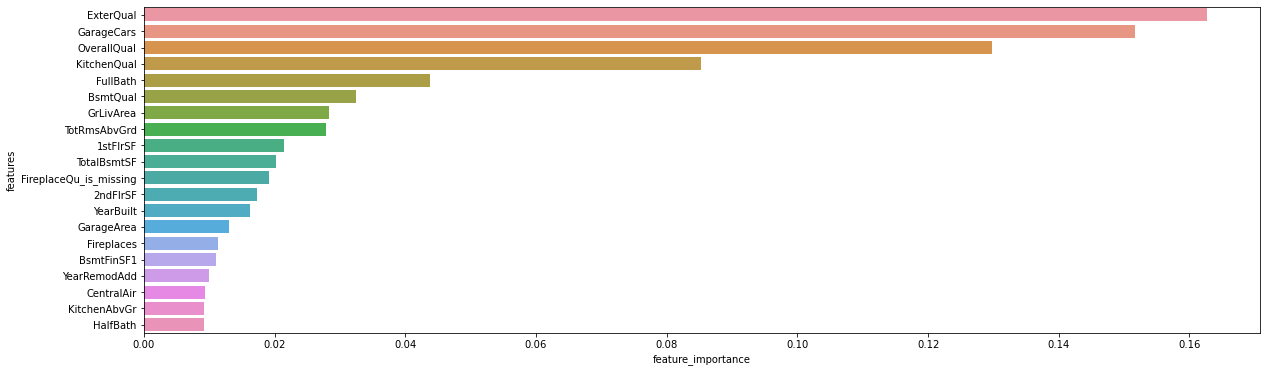

In [38]:
plt.figure(figsize=(20, 6))
plot_features(X_train.columns, best_model.feature_importances_)